# 周波数解析の簡単な解説

## 1. NumpyによるFFT

Numpyを  
```
import numpy as np
```
としてインポートしていることを前提としている。

***
### 【公式1】FFT（高速フーリエ変換）
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた配列を`arr`とする。そのとき，Numpy関数`np.fft.fft`を用いて
```
F_arr = np.fft.fft(arr)/len(arr)
```
として得られた`F_arr`は，`arr`を離散**フーリエ変換**した配列である。ここで右辺の`F_arr`は`arr`と**同じ要素数**`len(arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　`k = 0, 1, 2, ...`に対して，`F_arr[k]`はデータ`arr`の**周波数$\frac{H}{2^n}k$[Hz]のスペクトル**とよばれる。なお，`F_arr[0]`は`arr`の平均値（実数）に等しく，直流成分とよばれる。
> 1. 厳密には，この時系列データは周期関数的に変動することが仮定されている。
2. `len(arr)`が$2^n$**でない**ときでも，関数`np.fft.fft`は`arr`のFFTを行う。しかし，より正確かつ高速にFFTを行うには，`len(arr)`$=2^n$であるのが望ましい（でなければならない）。
3. 離散フーリエ変換の定義の違いによって，配列`arr`の要素数`len(arr)`$=2^n$で除さないときもある。Numpyでは`len(arr)`$=2^n$で除さないものを離散フーリエ変換の定義にしていることに注意。
4. `len(arr)`で除したのは，セクション２で述べられることと合致させるためである。実際，フーリエ変換の定義は**分野**によって異なる。ここでは，フーリエ変換を**フーリエ級数**と直接結びつけるために**"`len(arr)`で除す"**定義を採用した。つまり，結果を直感的にするために`len(arr)`で除した。

***
### 【公式2】逆FFT（逆高速フーリエ変換）
サンプルリング周波数$H$Hzの時系列データ配列（1D-numpy配列が望ましい）で，うまく$2^n$（$n$は自然数）個の要素に切り取られた実数データ配列を`arr`とし，`arr`公式1のようにスペクトル配列`F_arr`にスペクトル分解されていたとする。そのとき，`F_arr`は次の公式によって，元のデータ配列`arr`に戻すことができる：
```
arr = np.real(np.fft.ifft(F_arr)*len(F_arr))
```
`arr`は，`F_arr`を離散**逆フーリエ変換**した配列である。ここで右辺の`arr`は`F_arr`と**同じ要素数**`len(F_arr)`$=2^n$の**複素数**を要素にもつ配列である。  
　　データ`arr`は原信号と呼ばれ，`arr[l]`のindex `l = 0, 1, 2, ...`はサンプリング開始時刻を$0$としてそれぞれ，`t` = $0, \frac{1}{H}, \frac{2}{H}, ..., \frac{l}{H}, ..., \frac{2^n-1}{H} $[sec]である。  
> 1. `len(F_arr)`で乗じたのは，公式1において，もともとNumpyに実装されているFFT関数を`len(arr)`で除しているためである。
2. `np.real`関数を作用させているのは，結果が（事実上0の虚数部をもつ）複素数で出力されるため，実数部のみをとる（虚数部を捨てる）ためである。
***

## 2. FFTの解説 
　ここではコンピュータで扱う**高速離散フーリエ変換（FFT）**の解説を行うので，時系列データの**サンプリング数（要素数）$N$を特殊なケースの$2^n$にとる**が，一般の離散フーリエ変換（DFT）のサンプリング数は$N(>H)$でよい（$H$はサンプリング周波数）。ただし，$N$が偶数か奇数で，理論展開が少し異なる。ここでは$N=2^n$なので，偶数個の$N$の理論と全く同じである。  
 
　有名な**オイラーの公式**：$e^{i\theta}=\cos\theta+i\sin\theta$（ここで，$i=\sqrt{-1}$）を用いるが，この公式ぐらい暗記しておいても損はない。また，$e^{i\theta}$の**複素共役**は，$\cos\theta-i\sin\theta=\cos(-\theta)+i\sin(-\theta)=e^{-i\theta}$であることも付け加えておく。  

　簡単のため，サンプリング開始時刻$t_0$を$0$とし，十分大きな$2^n$（$n$は自然数）をとって，サンプリング周波数$H$のデータの時刻$t$が，等間隔に$t$ $\simeq \{ t_0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$ $=\{ 0, t_1, t_2, ...,t_l,..., t_{2^n-1} \}$と離散化されているとする。ここで，$\tau$ $:=$ $1/H$ $=t_1-t_0$ $(=t_1-0)$ $=t_2-t_1$ $=...=t_l-t_{l-1}$ $=...=t_{2^n-1}-t_{2^n-2}$とおく。そうすると，実数データ$\xi(t)$も離散化されて，$\xi = \xi(t)$ $\simeq \{\xi(t_0), \xi(t_1), \xi(t_2), ..., \xi(t_l),...,\xi(t_{2^n-1}) \}$ $= \{\xi(0), \xi(\tau), \xi(2\tau), ..., \xi(l\tau),...,\xi((2^n-1)\tau) \}$$=:\{\xi_0, \xi_1, \xi_2, ..., \xi_l,...,\xi_{2^n-1} \}$となる。

　さて，$\xi_l\ \ (l=0,1,2,...,2^{n}-1)$は，

$$
\xi_l=F_0+F_1e^{2\pi i\frac{1l}{2^n}}+F_2e^{2\pi i\frac{2l}{2^n}}+...
+F_ke^{2\pi i\frac{kl}{2^n}}+...+F_{2^n-1}e^{2\pi i\frac{(2^n-1)l}{2^n}}
\tag{1}
\\=\sum_{k=0}^{2^n-1}F_ke^{2\pi i\frac{kl}{2^n}}
$$

と分解できることがわかっている。ここで，$l$はデータ番号といわれ，時刻$t_0+l\tau(=l\tau)$におけるデータを表す添字である。この$F_k$を，データ$\{\xi_l\}$の**周波数**

$$
f_k:=
\frac{kH}{2^n}=
\frac{k}{2^n \tau}
$$

の**スペクトル**といい，$(1)$を**フーリエ逆変換**という。  

　$F_0$は実数で

$$F_0=\frac{1}{2^n}(\xi_0+\xi_1+\xi_2+...+\xi_{2^{n-1}}+...+\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}\xi_{k}=:a_0. \tag{2}$$

つまり$F_0=a_0$は全データの平均であり，したがって実数である。  

　$F_0$を除いた$\{F_1, F_2, ..., F_{2^n-1}\}$のちょうど中間に位置する$F_{2^{n-1}}(=F_{\frac{2^n}{2}})$もまた実数で，

$$F_{2^{n-1}}=\frac{1}{2^n}(\xi_0-\xi_1+\xi_2-\xi_3+...-\xi_{2^{n-1}-1}+\xi_{2^{n-1}}-\xi_{2^{n-1}+1}+...+\xi_{2^n-2}-\xi_{2^n-1})\\
=\frac{1}{2^n}\sum_{k=0}^{2^n-1}(-1)^k\xi_{k}=:a_{2^{n-1}} \tag{3}$$

で与えられる。これをスペクトルの**ナイキスト成分**といい，このときの周波数$\frac{H}{2}=\frac{1}{2\tau}$を**ナイキスト周波数**とよぶ。$(1)$における，$F_{2^{n-1}}=a_{2^{n-1}}$の係数は

$$
e^{2\pi i\frac{2^{n-1}l}{2^n}}=\cos{2\pi \frac{2^{n-1}l}{2^n}}+i\sin{2\pi \frac{2^{n-1}l}{2^n}}=\cos(\pi l)=(-1)^l \tag{4}
$$

で，これも実数である。 ここで，$\sin(\pi l)=0$に注意せよ。後の便宜のため，$(1)$における$F_{2^{n-1}}$の項を

$$
F_{2^{n-1}}e^{2\pi i\frac{2^{n-1}l}{2^n}}=a_{2^{n-1}}(-1)^l
$$

としておこう。  

　その他の$F_k$は一般的に複素数なので，

$$F_k =: a_k-ib_k \tag{6}$$ 

とおける。ここで，$a_k,\ b_k$は実数。そうすると，

$$
a_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \cos(\frac{2\pi kl}{2^n}),\ \ 
b_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1} \xi_l \sin(\frac{2\pi kl}{2^n}) \tag{7}
$$

と書けることがわかっている。$(7)$の２つの式の右辺は気にするな。重要なのは，$0<k<2^{n-1}$で  

$$F_{2^n-k}=\overline{F_k}=a_k+ib_k \tag{8}$$

となることだ（$\cos$が偶関数，$\sin$が奇関数からこのことはほとんど自明）。ここで，記号の上に引いてあるバーは，それの複素共役を示している。$(8)$の関係式は，$(1)$の$a_0,\ a_{2^{n-1}}$の項以外の項の和が実数であることを保証する（エルミート性）。実際，$(1)$における$F_k$の項と$F_{2^n-k}$の項の和は，

$$
F_{k}e^{2\pi i\frac{kl}{2^n}}+F_{2^n-k}e^{2\pi i\frac{(2^n-k)l}{2^n}}
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_k}e^{-2\pi i\frac{kl}{2^n}}\\
=F_{k}e^{2\pi i\frac{kl}{2^n}}+\overline{F_ke^{2\pi i\frac{kl}{2^n}}}
$$

$$
=2a_k\cos(\frac{2\pi kl}{2^n})+2b_k\sin(\frac{2\pi kl}{2^n}),\ \ (k\neq0,\ 2^{n-1}) \tag{9}
$$

となり，実数である。  

　$(2),(3),(5),(9)$から，$(1)$は

$$
\xi_l = \xi(l\tau) =\xi(t_l)
\\
$$

$$
=a_0 +
\bigr\{2a_1\cos{\frac{2\pi 1l}{2^n}}+2b_1\sin{\frac{2\pi 1l}{2^n}}\bigr\}\\
+\bigr\{2a_2\cos{\frac{2\pi 2l}{2^n}}+2b_2\sin{\frac{2\pi 2l}{2^n}}\bigr\}+...\\
...+\bigr\{2a_k\cos{\frac{2\pi kl}{2^n}}+2b_k\sin{\frac{2\pi kl}{2^n}}\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}-1}\cos{\frac{2\pi (2^{n-1}-1)l}{2^n}}+2b_{2^{n-1}-1}\sin{\frac{2\pi (2^{n-1}-1)l}{2^n}}\bigr\}
+a_{2^{n-1}}(-1)^l\\
$$

$$
=a_0 +
\bigr\{2a_1\cos{2\pi\frac{H}{2^n}t_l}+2b_1\sin{2\pi\frac{H}{2^n}t_l}\bigr\}\\
+\bigr\{2a_2\cos{2\pi\frac{2H}{2^n}t_l}+2b_2\sin{2\pi\frac{2H}{2^n}t_l}\bigr\}+...\\
...+\bigr\{2a_k\cos{2\pi\frac{kH}{2^n}t_l}+2b_k\sin{2\pi\frac{kH}{2^n}t_l}\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}-1}\cos{2\pi\frac{(2^{n-1}-1)H}{2^n}t_l}+2b_{2^{n-1}-1}\sin{2\pi\frac{(2^{n-1}-1)H}{2^n}t_l}\bigr\}
+a_{2^{n-1}}(-1)^l
$$

$$
=a_0 +
\bigr\{2a_1\cos{2\pi f_1 t_l}+2b_1\sin{2\pi f_1 t_l}\bigr\}\\
+\bigr\{2a_2\cos{2\pi f_2 t_l}+2b_2\sin{2\pi f_2 t_l}\bigr\}+...\\
...+\bigr\{2a_k\cos{2\pi f_k t_l}+2b_k\sin{2\pi f_k t_l}\bigr\}+...\\
...+\bigr\{2a_{2^{n-1}-1}\cos{2\pi f_{2^{n-1}-1} t_l}+2b_{2^{n-1}-1}\sin{2\pi f_{2^{n-1}-1} t_l}\bigr\}
+a_{2^{n-1}}(-1)^l
$$

$$
=a_0+\sum_{k=1}^{2^{n-1}-1}\bigr\{ 2a_k\cos{\frac{2\pi lk}{2^n}} +  2b_k\sin{\frac{2\pi lk}{2^n}}\bigr\}+a_{2^{n-1}}(-1)^l \tag{10a}
$$

$$
=a_0+\sum_{k=1}^{2^{n-1}-1}\bigr\{ 2a_k\cos{\frac{2\pi kH}{2^n}t_l} +  2b_k\sin{\frac{2\pi kH}{2^n}t_l}\bigr\}+a_{2^{n-1}}(-1)^l \tag{10b}
$$

$$
=a_0+\sum_{k=1}^{2^{n-1}-1}\bigr\{ 2a_k\cos{2\pi f_k t_l} +  2b_k\sin{2\pi f_k t_l}\bigr\}+a_{2^{n-1}}(-1)^l  \tag{10c}
$$

ここで，$H=1/\tau,\ l\tau=t_l\ \rightarrow \ l=Ht_l$を使った。$(10)$より，離散時系列データ$\xi$の任意の時刻$t_l$におけるデータ点$\xi_l$は，サンプリング時間における$\xi$の平均$a_0$，ナイキスト成分$a_{2^{n-1}}$と，$k=1,2,...,2^{n-1}-1$として，**周波数$f_k := \frac{kH}{2^n}$をもつ振幅$2a_k$の余弦波と振幅$2b_k$の正弦波の和として展開できる**ことが解った。  

　このように $F_0,F_1,...,F_{2^{n}-1}$ は，回路またはコンピュータ上で，離散データを$(1)$または$(10)$のように展開したとき，サンプリングデータの全時刻における**平均**と**ナイキスト成分**および，**取り得る周波数の余弦波と正弦波のそれぞれの振幅の$\frac{1}{2}$を複素数を用いて表すことに等しい**。式で書くと（気にするな）：

$$
F_k=\frac{1}{2^n}\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{k}{2^n}l}=
\frac{1}{2^n}\sum_{l=0}^{2^n-1}\xi_le^{2\pi i\frac{kH}{2^n}l\tau} \tag{11a},
\ \ \ (k=0,1,2,...,2^n-1),
$$

$$
\mathrm{or}
$$

$$
F(f_k)=\frac{1}{2^n}\sum_{l=0}^{2^n-1}\xi(t_l)e^{2\pi if_k t_l}, \ \ \ \mathrm{where} \ f_k = \frac{kH}{2^n}, \ t_l=\frac{l}{H} \tag{11b}.
$$

式$(11)$を高速離散フーリエ変換(FFT)という。  
　こうして，【公式１】は，**要素数$2^n$**のデータ`arr`について，  
 - `F_arr[0]`は`arr`の平均を与える。
 - `F_arr[1]`は周波数$f_1:=\frac{H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波の振幅(虚数成分)の$\frac{1}{2}$を与える。
 - `F_arr[2]`は周波数$f_2:=\frac{2H}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $k$ `]`は周波数$f_k:=\frac{kH}{2^n}$の`arr`の余弦波(実数成分)の振幅の$\frac{1}{2}$と正弦波(虚数成分)の振幅の$\frac{1}{2}$を与える。
 - ...
 - `F_arr[` $2^{n-1}$ `]`は周波数$f_{2^n-1}:=\frac{2^{n-1}H}{2^n}=\frac{H}{2}$（**ナイキスト周波数**）のナイキスト成分:
`(arr[0]-arr[1]+arr[2]-...-arr[` $2^n-1$ `])/`$2^n$を与える。これをPython-Numpyコードで書くと次のようになる：
 ```
 np.sum(arr * np.array([(-1)**k for k in range(len(arr))]))/len(arr)  
```
 - これ以降は順に，`F_arr[` $2^{n-1}-1$ `]`, `F_arr[` $2^{n-1}-2$ `]`, ... , `F_arr[2]`, `F_arr[1]`の複素共役である。  
 
　データ$\{\xi_l\}$の各$F_k$の絶対値の２乗  
 
$$
P_k:=\mid F_k \mid ^2 \tag{12}
$$

を周波数$f_k=\frac{kH}{2^n}$の**パワー(Power)**という。これは，データ$\{\xi_l\}$をスペクトル分解したときの周波数$f_k=\frac{kH}{2^n}$の強度を表す。
 ***

## 3. 解析例

◼️3-1. 必要なモジュールをインポートする：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

> ナイキスト周波数は5Hzだ。

◼️3-2. サンプリング周波数10Hzの64(=2$^6$)個の要素を持つデータでスペクトル解析を行ってみる。

◽︎3-2-1. 次のようなデータ配列`x`を用意する：

In [2]:
x = np.array([ 3.005,  3.139,  0.887, -0.842, -0.049,  2.079,  4.781,  4.601,
               2.84 , -0.501, -2.735, -1.566,  0.656,  1.454,  1.033, -1.232,
              -3.631, -4.017, -1.245,  1.319,  3.449,  2.798,  0.481, -0.547,
               0.106,  2.153,  4.771,  5.109,  2.993, -0.146, -2.153, -1.651,
               0.613,  1.278,  1.187, -1.624, -3.804, -3.767, -1.202,  1.528,
               3.635,  3.116,  1.004, -0.896, -0.132,  2.574,  4.644,  4.777,
               2.126, -0.23 , -2.35 , -2.237,  0.671,  1.51 ,  0.579, -1.524,
              -3.596, -3.608, -1.672,  1.81 ,  3.772,  3.077,  1.137, -0.918])

▫︎3-2-2. `x`グラフは，次のようになる：

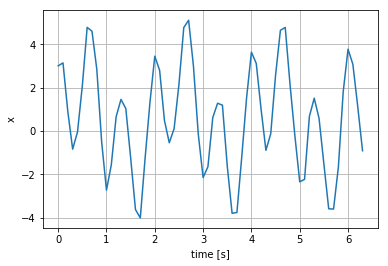

In [3]:
plt.plot(np.arange(64)/10,x)  # 第１引数はサンプルリング時刻
plt.xlabel('time [s]')
plt.ylabel('x')
plt.grid()
plt.show()

> 時刻配列は初期時刻を0[sec]とすると，`np.arange(64)/10`[sec]で与えられる。

◼️3-3. FFT周波数配列をもとめる。

▫︎3-3-1. サンプリング周波数10Hzでサンリングデータ数が64であることに注意しよう。そのとき，FFT周波数配列を`frq`とすると：

In [4]:
frq = np.array([k*10/64 for k in range(64)])

▫︎3-3-2. `frq`の内容を見てみる：

In [5]:
frq

array([0.     , 0.15625, 0.3125 , 0.46875, 0.625  , 0.78125, 0.9375 ,
       1.09375, 1.25   , 1.40625, 1.5625 , 1.71875, 1.875  , 2.03125,
       2.1875 , 2.34375, 2.5    , 2.65625, 2.8125 , 2.96875, 3.125  ,
       3.28125, 3.4375 , 3.59375, 3.75   , 3.90625, 4.0625 , 4.21875,
       4.375  , 4.53125, 4.6875 , 4.84375, 5.     , 5.15625, 5.3125 ,
       5.46875, 5.625  , 5.78125, 5.9375 , 6.09375, 6.25   , 6.40625,
       6.5625 , 6.71875, 6.875  , 7.03125, 7.1875 , 7.34375, 7.5    ,
       7.65625, 7.8125 , 7.96875, 8.125  , 8.28125, 8.4375 , 8.59375,
       8.75   , 8.90625, 9.0625 , 9.21875, 9.375  , 9.53125, 9.6875 ,
       9.84375])

> 可能なFFT周波数は`0.`, `0.15625`, `0.3125`,..., `4.84375`, `5.`,..., `9.6875` ,`9.84375`[Hz]。このうち，`0.`[Hz]は直流周波数，`5.`[Hz]はナイキスト周波数，`9.84375`[Hz]は最大周波数である。

◼️3-4. データをフーリエ変換して，スペクトルを求める。

◽︎3-4-1. 公式1から，データ`x`をFFTし，可能な周波数の各スペクトルを得てみる。スペクトル配列を`F_x`とする：

In [6]:
F_x = np.fft.fft(x)/len(x)

◽︎3-4-2. `F_x`の全成分を見てみる：

In [7]:
F_x

array([ 0.60651562+0.j        ,  0.05338374-0.02641583j,
        0.13676051-0.06861002j,  0.54237422-0.66533345j,
       -0.12502297+0.30519792j, -0.04448136+0.15046563j,
       -0.05956174+0.2053842j , -0.06200979+0.1667692j ,
       -0.0857824 +0.28260584j, -0.21173226+0.69837398j,
        0.33803748-1.03779766j,  0.10896881-0.28551312j,
        0.04425647-0.18058519j,  0.02224283-0.12868357j,
        0.0431695 -0.10333967j,  0.01471997-0.065922j  ,
        0.05479688-0.07503125j,  0.08003865-0.07145435j,
        0.0203306 -0.01954396j, -0.01041401-0.0558565j ,
       -0.00815413-0.02547231j,  0.03220215-0.02807645j,
        0.084749  -0.02776028j,  0.00385495-0.04008064j,
        0.0089699 -0.01280041j,  0.00643778-0.06325663j,
        0.03350707-0.03556691j,  0.02820117+0.00616836j,
        0.03442062+0.0214358j ,  0.0173886 -0.01767039j,
        0.04338258+0.00982221j,  0.01682456+0.01380056j,
        0.07476563+0.j        ,  0.01682456-0.01380056j,
        0.04338258-0.00982221j,

> Numpyでは$\sqrt{-1}$を`j`で表すことになっている。つまり，`F_x`のすべての成分は複素数である（ただし，indexが0と32は実質的には実数である）。

◼️3-5. `F_x[0]`がデータ`x`の平均を与えているかを確かめてみる：

In [8]:
print(f'F_x[0]={F_x[0]}')
print(f'xの平均: {np.mean(x)}')

F_x[0]=(0.6065156249999999+0j)
xの平均: 0.6065156249999999


◼️3-6.  ナイキスト成分(ナイキスト周波数5Hz)`F_x[32]`の成分がセクション２の式$(3)$を与えるかを確かめてみる：

In [9]:
print(f'F_x[32]={F_x[32]}')
print(f'(x[0]-x[1]+x[2]-...-x[63])/64={np.sum(x * np.array([(-1)**k for k in range(64)]))/64}')

F_x[32]=(0.074765625+0j)
(x[0]-x[1]+x[2]-...-x[63])/64=0.074765625


> `np.sum(x * np.array([(-1)**k for k in range(64)]))`の部分が`x[0]-x[1]+x[2]-...-x[63]`の計算コードだ。

◼️3-7. `F_x[0]=0.60651562+0.j`とナイキスト成分`F_x[32]=0.074765625+0j`除く複素数成分が，ナイキスト成分を中心として，互いに**複素共役**になっていることを確かめよう：

In [10]:
for k in range(1, 32):
    print(f'F_x[{k}]={np.round(F_x[k],6)}\tF_x[{64-k}]={np.round(F_x[64-k],6)}\t')

F_x[1]=(0.053384-0.026416j)	F_x[63]=(0.053384+0.026416j)	
F_x[2]=(0.136761-0.06861j)	F_x[62]=(0.136761+0.06861j)	
F_x[3]=(0.542374-0.665333j)	F_x[61]=(0.542374+0.665333j)	
F_x[4]=(-0.125023+0.305198j)	F_x[60]=(-0.125023-0.305198j)	
F_x[5]=(-0.044481+0.150466j)	F_x[59]=(-0.044481-0.150466j)	
F_x[6]=(-0.059562+0.205384j)	F_x[58]=(-0.059562-0.205384j)	
F_x[7]=(-0.06201+0.166769j)	F_x[57]=(-0.06201-0.166769j)	
F_x[8]=(-0.085782+0.282606j)	F_x[56]=(-0.085782-0.282606j)	
F_x[9]=(-0.211732+0.698374j)	F_x[55]=(-0.211732-0.698374j)	
F_x[10]=(0.338037-1.037798j)	F_x[54]=(0.338037+1.037798j)	
F_x[11]=(0.108969-0.285513j)	F_x[53]=(0.108969+0.285513j)	
F_x[12]=(0.044256-0.180585j)	F_x[52]=(0.044256+0.180585j)	
F_x[13]=(0.022243-0.128684j)	F_x[51]=(0.022243+0.128684j)	
F_x[14]=(0.04317-0.10334j)	F_x[50]=(0.04317+0.10334j)	
F_x[15]=(0.01472-0.065922j)	F_x[49]=(0.01472+0.065922j)	
F_x[16]=(0.054797-0.075031j)	F_x[48]=(0.054797+0.075031j)	
F_x[17]=(0.080039-0.071454j)	F_x[47]=(0.080039+0.071454j)	
F_x[

> 見やすくするため，小数第６位までを表示している。

◼️3-6. F_xにおいて，0Hzとを除いたナイキスト周波数(5Hz)の一つ前までの各成分の実数部の２倍がcos波の振幅配列，虚数部の２倍がsin波の振幅配列なので，それぞれを`C`, `S`とすると：

◽︎3-6-1. 複素配列の実数パートのみを得るためには，`np.real(arr)`関数を用いる。よって`C`は次のようにして得られる：

In [11]:
C = 2 * np.real(F_x[1:32])

◽︎3-6-2. `F_x`の`cos`波の振幅`C`を周波数ごとに（ナイキスト周波数の一つ前まで）プロットしてみる：

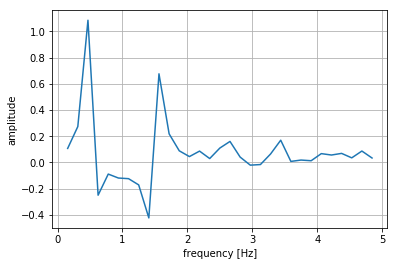

In [12]:
plt.plot(frq[1:32], C)
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.grid()

◽︎3-6-3. 複素配列の実数パートのみを得るためには，`np.imag(arr)`関数を用いる。よって`S`は次のようにして得られる：

In [13]:
S = -2 * np.imag(F_x[1:32])

> セクション２の(6)をみよ。$ib_x$の前に負号が付いているので，上記左辺にも負号がついている。

◽︎3-6-4. `F_x`の`sin`波の振幅`S`を周波数ごとに（ナイキスト周波数の一つ前まで）プロットしてみる：

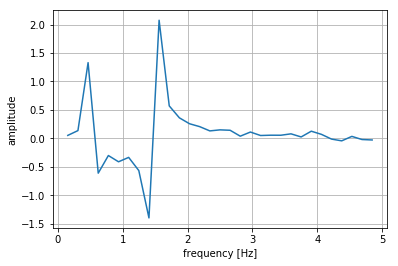

In [14]:
plt.plot(frq[1:32], S)
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.grid()

◽︎3-6-5. `C`と`S`を１つのグラフにプロットしてみよう：

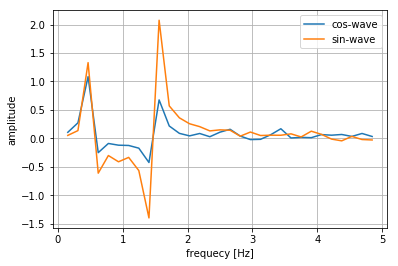

In [15]:
plt.plot(frq[1:32], C)
plt.plot(frq[1:32], S)
plt.legend(['cos-wave','sin-wave'] )
plt.xlabel('frequecy [Hz]')
plt.ylabel('amplitude')
plt.grid()
plt.show()

◼️3-7. スペクトルの**パワー**を求める。パワーはスペクトルの**強度**を示すものであった。例えば虹で，**青**が濃く見えるときは，光のスペクトルの青のパワー（強度）が強いということになる。

◽︎3-7-1. `F_x`のパワーを`P_x`とする：

In [16]:
P_x = np.abs(F_x)**2

> 複素配列のそれぞれの要素の絶対値の配列を求めるには，`np.abs(arr)`を使う。

◽︎3-7-2. パワーを取りうべき周波数の全範囲に渡ってプロットしてみる：

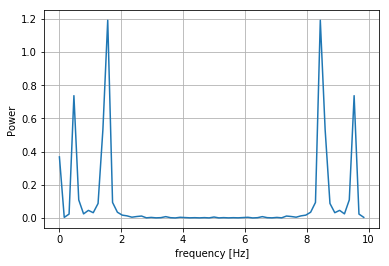

In [17]:
plt.plot(frq, P_x)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.grid()

> 上記グラフは0Hzを除いて，ナイキスト周波数(5Hz)を中心にして左右対称である。

◽︎3-7-3. 0Hzとナイキスト周波数(5Hz)の間のパワーのグラフをプロットしてみる（0Hzとナイキスト周波数は含まない）：

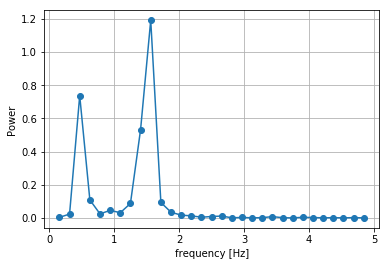

In [18]:
plt.plot(frq[1:32], P_x[1:32], '-o')
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.grid()

> パワーのピークは1.5Hz付近，その次のピークは0.5Hz付近に現れている。

◽︎3-7-3. 0Hzとナイキスト周波数(5Hz)の間（0Hzとナイキスト周波数は含まない）のパワー`P_x`の大きいものから順に５つ分取り出す：

In [19]:
np.sort(P_x[1:32])[::-1][:5]

array([1.19129332, 0.73683839, 0.53255677, 0.10877651, 0.09339194])

> スペクトルの強さは最初の３つ（1.19129332, 0.73683839, 0.53255677）が際立っている。

◽︎3-7-4. 0Hzとナイキスト周波数(5Hz)の間（0Hzとナイキスト周波数は含まない）のパワー`P_x`の大きいものから順の周波数を５つ取り出す：

In [20]:
frq[:32][np.argsort(P_x[1:32])[::-1]][:5]

array([1.40625, 0.3125 , 1.25   , 0.46875, 1.5625 ])

> つまりこのデータのスペクトルは 1.40625Hz, 0.3125Hz, 1.25Hz, 0.46875Hz, 1.5625Hz, ...の周波数順に強いことがわかる。

◼️公式２にしたがって，スペクトル`F_x`を逆変換し，それを変数`x_new`に格納する。

In [21]:
x_new = np.fft.ifft(F_x)*len(F_x)
print(x_new)

[ 3.005+0.00000000e+00j  3.139-1.52655666e-16j  0.887+0.00000000e+00j
 -0.842+2.22044605e-16j -0.049+0.00000000e+00j  2.079+2.77555756e-17j
  4.781+0.00000000e+00j  4.601-2.49800181e-16j  2.84 +0.00000000e+00j
 -0.501-1.38777878e-17j -2.735+0.00000000e+00j -1.566-1.66533454e-16j
  0.656+0.00000000e+00j  1.454-2.77555756e-17j  1.033+0.00000000e+00j
 -1.232+4.16333634e-16j -3.631+0.00000000e+00j -4.017+6.93889390e-17j
 -1.245+0.00000000e+00j  1.319-2.77555756e-16j  3.449+0.00000000e+00j
  2.798+2.49800181e-16j  0.481+0.00000000e+00j -0.547+2.77555756e-17j
  0.106+0.00000000e+00j  2.153+9.71445147e-17j  4.771+0.00000000e+00j
  5.109-1.66533454e-16j  2.993+0.00000000e+00j -0.146+1.94289029e-16j
 -2.153+0.00000000e+00j -1.651-2.77555756e-17j  0.613+0.00000000e+00j
  1.278-3.74700271e-16j  1.187+0.00000000e+00j -1.624+2.22044605e-16j
 -3.804+0.00000000e+00j -3.767+2.77555756e-17j -1.202+0.00000000e+00j
  1.528-1.38777878e-16j  3.635+0.00000000e+00j  3.116+9.71445147e-17j
  1.004+0.00000000e+

> `x_new`は，元の`x`に厳密には戻っていない。特に，非常に小さいが虚数成分が現れる。これらはコンピュータの誤差である。

◽︎そこでまず，x_newの虚数成分を取り除き，それをx_new_Rという変数に代入する：

In [22]:
x_new_R = np.real(x_new)
print(x_new_R)

[ 3.005  3.139  0.887 -0.842 -0.049  2.079  4.781  4.601  2.84  -0.501
 -2.735 -1.566  0.656  1.454  1.033 -1.232 -3.631 -4.017 -1.245  1.319
  3.449  2.798  0.481 -0.547  0.106  2.153  4.771  5.109  2.993 -0.146
 -2.153 -1.651  0.613  1.278  1.187 -1.624 -3.804 -3.767 -1.202  1.528
  3.635  3.116  1.004 -0.896 -0.132  2.574  4.644  4.777  2.126 -0.23
 -2.35  -2.237  0.671  1.51   0.579 -1.524 -3.596 -3.608 -1.672  1.81
  3.772  3.077  1.137 -0.918]


> print関数の表示上，`x_new_R`は元の`x`に等しいように**見える**。

◽︎`x_new_R`の本当の（実数）誤差を見るために，`x_new_R`から`x`を差し引いてみる：

In [23]:
x_new_R - x

array([ 0.00000000e+00,  1.33226763e-15,  0.00000000e+00, -1.11022302e-16,
       -3.74700271e-16, -4.44089210e-16,  0.00000000e+00, -8.88178420e-16,
        0.00000000e+00, -7.77156117e-16, -8.88178420e-16, -6.66133815e-16,
       -1.11022302e-16,  2.22044605e-16, -4.44089210e-16,  0.00000000e+00,
        0.00000000e+00, -1.77635684e-15, -6.66133815e-16,  4.44089210e-16,
        0.00000000e+00,  8.88178420e-16, -3.33066907e-16,  1.11022302e-16,
       -1.24900090e-16, -4.44089210e-16,  8.88178420e-16,  1.77635684e-15,
        0.00000000e+00,  8.32667268e-17, -4.44089210e-16, -8.88178420e-16,
       -4.44089210e-16,  4.44089210e-16, -2.22044605e-16,  0.00000000e+00,
        4.44089210e-16, -4.44089210e-16, -8.88178420e-16,  2.22044605e-16,
        8.88178420e-16,  4.44089210e-16,  0.00000000e+00, -7.77156117e-16,
       -5.55111512e-16, -8.88178420e-16,  0.00000000e+00,  8.88178420e-16,
        0.00000000e+00, -1.30451205e-15, -4.44089210e-16,  0.00000000e+00,
        2.22044605e-16,  

> $10^{-15}$〜$10^{-17}$という非常に小さいオーダーであるが，実数誤差も確かに存在していることがわかる。ただし，この誤差はサンプル数を多くするほど0に収束していくことが知られている。